In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from numpy.linalg import LinAlgError
pd.set_option('display.max_columns', None)

In [4]:
#Data First Cleansed
df = pd.read_csv('/Users/moneysniper/Documents/NBA_analysis_project/gamelogs/nba_games_cleansed.csv')
cols_to_select = [
    'home', 'season', 'won', 'diff_pts', 'diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa'
    ]
df = df[df["home"] == 1].reset_index(drop=True)[cols_to_select].dropna(subset = cols_to_select)
#April 9, 2024: Celtics shot none free throws and Bucks 2, and therefore ft% being null for one party
df

,home,season,won,diff_pts,diff_orb,diff_tov,diff_3p%,diff_2p%,diff_ft%,diff_fta,diff_3pa
0,1,2023,False,-3.0,1.0,-8.0,-7.3,-5.079365,1.0,-6.0,2.0
1,1,2023,False,-15.0,1.0,6.0,0.9,-16.666667,-5.8,7.0,14.0
2,1,2016,False,-3.0,14.0,-5.0,-7.4,-12.069375,6.4,1.0,11.0
3,1,2023,True,13.0,7.0,-4.0,6.7,0.000000,-8.1,-11.0,10.0
4,1,2018,True,8.0,1.0,-2.0,-4.0,4.590018,15.6,-4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
11504,1,2019,True,16.0,-5.0,2.0,21.1,0.087977,1.1,13.0,-7.0
11505,1,2017,False,-5.0,5.0,-3.0,-9.6,1.020408,-20.3,-17.0,8.0
11506,1,2024,False,-7.0,-6.0,-4.0,-1.7,-1.551724,-14.6,-8.0,7.0
11507,1,2020,False,-11.0,2.0,-1.0,-7.3,-3.017776,-4.3,4.0,18.0


In [5]:
original_factors = ['diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa']
X_1 = df[original_factors]
y_1 = df['won']
X_1 = sm.add_constant(X_1)
model = sm.Logit(y_1, X_1)
result = model.fit()
print(result.summary())
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.157115
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                11508
Model:                          Logit   Df Residuals:                    11500
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.7701
Time:                        13:35:04   Log-Likelihood:                -1808.1
converged:                       True   LL-Null:                       -7863.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668      0.043      1.550      0.121      -0.018       0.151
diff_orb       0.4775      0.

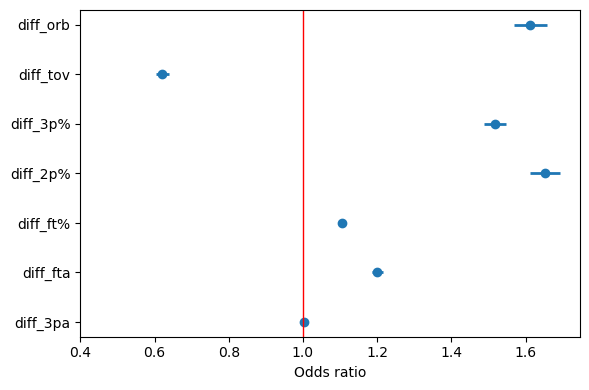

In [7]:
# -------------------------------------------------
# 1.  Odds ratios and 95 % CIs
# -------------------------------------------------
or_   = np.exp(result.params)            # odds ratios
ci    = result.conf_int()                # DataFrame with cols 0 = lower, 1 = upper
ci_l  = np.exp(ci[0])                    # lower limit
ci_u  = np.exp(ci[1])                    # upper limit

# drop the constant
mask   = or_.index != "const"
labels = or_.index[mask]
or_    = or_[mask]
ci_l   = ci_l[mask]
ci_u   = ci_u[mask]

# -------------------------------------------------
# 2.  Plot
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4))

y_pos = np.arange(len(labels))[::-1]      # plot from top to bottom
ax.hlines(y_pos, ci_l, ci_u, lw=2)        # whiskers
ax.plot(or_, y_pos, "o", ms=6)            # dots

ax.axvline(1, color="red", lw=1)          # reference line at OR = 1
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Odds ratio")
ax.set_xlim(left=min(0.4, ci_l.min()*0.9))

plt.tight_layout()
plt.show()

In [4]:
#single regression
import statsmodels.api as sm
import numpy as np

# The factors you want to test one-by-one
original_factors = ['diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa']

# Your outcome variable
y = df['won']

for factor in original_factors:
    # Add constant to our single-factor X
    X_single = sm.add_constant(df[[factor]])

    # Fit the logistic regression model
    model_single = sm.Logit(y, X_single)
    result_single = model_single.fit(disp=False)  # disp=False to suppress iteration output

    # Print which factor this model is for
    print(f"\nSingle-factor model for: {factor}")
    print(result_single.summary())

    print("Exponentiated coefficients:")
    print(np.exp(result_single.params))


Single-factor model for: diff_orb
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                11508
Model:                          Logit   Df Residuals:                    11506
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:               0.0006684
Time:                        16:12:15   Log-Likelihood:                -7858.2
converged:                       True   LL-Null:                       -7863.5
Covariance Type:            nonrobust   LLR p-value:                  0.001186
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.019     15.083      0.000       0.247       0.321
diff_orb      -0.0113      0.003     -3.240      0.001      -0.018      -0.004
Exponentiated coe

In [6]:
import pandas as pd

# Define the years to loop through
years = range(2016, 2025)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each year and process the corresponding file
for year in years:
    file_path = f'/Users/moneysniper/Documents/NBA_analysis_project/gamelogs/regular_season_{year}.csv'
    df = pd.read_csv(file_path)
    cols_to_select = [
        'home', 'season', 'won', 'diff_pts', 'diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa'
    ]
    df = df[df["home"] == 1].reset_index(drop=True)[cols_to_select].dropna(subset=cols_to_select)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame
final_df

,home,season,won,diff_pts,diff_orb,diff_tov,diff_3p%,diff_2p%,diff_ft%,diff_fta,diff_3pa
0,1,2016,True,20.0,7.0,1.0,1.8,6.164919,11.9,7.0,-9.0
1,1,2016,False,-8.0,-7.0,-1.0,4.4,4.420866,-2.1,-14.0,24.0
2,1,2016,False,-8.0,-4.0,-9.0,12.3,-13.005051,-15.5,9.0,-5.0
3,1,2016,False,-3.0,9.0,0.0,0.6,-10.784314,6.4,-8.0,5.0
4,1,2016,False,-7.0,5.0,1.0,-25.0,-0.724638,8.0,-12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
10957,1,2024,True,6.0,1.0,1.0,6.2,-1.152482,-5.7,9.0,-6.0
10958,1,2024,False,-14.0,6.0,4.0,-2.3,-19.438776,6.7,-5.0,-3.0
10959,1,2024,False,-11.0,2.0,4.0,9.6,-15.622801,1.2,-7.0,-10.0
10960,1,2024,False,-14.0,-10.0,0.0,-3.8,-2.790698,16.4,-7.0,-10.0


In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Define the years to loop through
years = range(2016, 2025)

# Define the original factors
original_factors = ['diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa']

# Loop through each year and run the model
for year in years:
    # Construct the file path
    file_path = f'/Users/moneysniper/Documents/NBA_analysis_project/gamelogs/regular_season_{year}.csv'
    
    # Load the data
    df = pd.read_csv(file_path)
    cols_to_select = [
        'home', 'season', 'won', 'diff_pts', 'diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa'
    ]
    df = df[df["home"] == 1].reset_index(drop=True)[cols_to_select].dropna(subset=cols_to_select)
    
    # Prepare the data for the model
    X_1 = df[original_factors]
    y_1 = df['won']
    X_1 = sm.add_constant(X_1)
    
    # Fit the model
    model = sm.Logit(y_1, X_1)
    result = model.fit()
    
    # Print the summary and exponentiated parameters
    print(f"Season: {year}")
    print(result.summary())
    print(np.exp(result.params))
    print("\n" + "="*80 + "\n")

Optimization terminated successfully.
         Current function value: 0.136250
         Iterations 9
Season: 2016
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.7989
Time:                        12:28:44   Log-Likelihood:                -167.59
converged:                       True   LL-Null:                       -833.15
Covariance Type:            nonrobust   LLR p-value:                3.075e-283
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.146     -0.042      0.966      -0.293       0.281
diff_orb       0

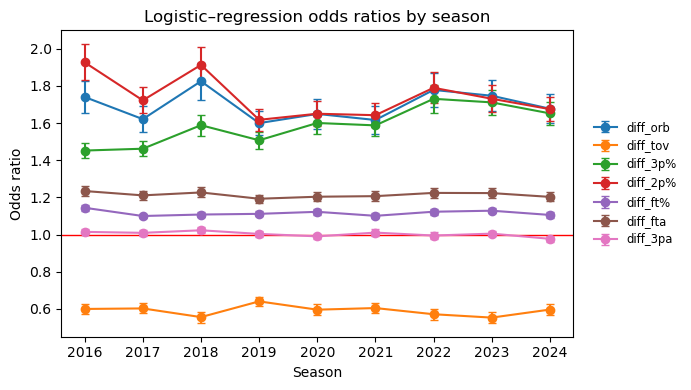

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path

years            = range(2016, 2025)
original_factors = ['diff_orb','diff_tov','diff_3p%','diff_2p%','diff_ft%','diff_fta','diff_3pa']

# ------------------------------------------------------------------
# 1.  Fit per‑season models and store ORs + SE(OR)
# ------------------------------------------------------------------
OR_rows, SE_rows = [], []

for year in years:
    fp = Path(f'/Users/moneysniper/Documents/NBA_analysis_project/'
              f'gamelogs/regular_season_{year}.csv')

    df = (pd.read_csv(fp)
            .query('home == 1')
            .dropna(subset=original_factors + ['won']))

    X  = sm.add_constant(df[original_factors])
    y  = df['won']
    res = sm.Logit(y, X).fit(disp=False)

    or_   = np.exp(res.params)               # odds ratios
    se_or = or_ * res.bse                   # delta‑method SEs

    OR_rows.append ({'season': year, **or_.drop ('const').to_dict()})
    SE_rows.append({'season': year, **se_or.drop('const').to_dict()})

or_table = pd.DataFrame(OR_rows).set_index('season').sort_index()
se_table = pd.DataFrame(SE_rows).set_index('season').sort_index()

# ------------------------------------------------------------------
# 2.  Plot with error bars; legend outside
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 4))
for col in original_factors:
    ax.errorbar(or_table.index,
                or_table[col],
                yerr=se_table[col],
                marker='o', linestyle='-',
                capsize=3, label=col)

ax.axhline(1, color='red', lw=1)            # reference line (OR = 1)
ax.set_xlabel('Season')
ax.set_ylabel('Odds ratio')
ax.set_title('Logistic–regression odds ratios by season')

# move legend just outside the right edge
ax.legend(frameon=False,
          loc='center left',
          bbox_to_anchor=(1.02, 0.5),
          fontsize='small')

fig.subplots_adjust(right=0.78)             # leave room for the legend
plt.tight_layout()
plt.show()

In [7]:
#single regressions
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Define the years to loop through
years = range(2016, 2025)

# Define the original factors
original_factors = ['diff_orb', 'diff_tov', 'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa']

# Loop through each year
for year in years:
    # Construct the file path
    file_path = f'/Users/moneysniper/Documents/NBA_analysis_project/gamelogs/regular_season_{year}.csv'
    
    # Load the data
    df = pd.read_csv(file_path)
    cols_to_select = [
        'home', 'season', 'won', 'diff_pts', 'diff_orb', 'diff_tov', 
        'diff_3p%', 'diff_2p%', 'diff_ft%', 'diff_fta', 'diff_3pa'
    ]
    
    # Filter for home games and drop rows with missing data
    df = df[df["home"] == 1].reset_index(drop=True)[cols_to_select]
    df = df.dropna(subset=cols_to_select)
    
    print(f"=== Season: {year} ===")
    
    # Loop over each factor for single-factor regressions
    for factor in original_factors:
        # Prepare data: single factor + constant
        X_single = df[[factor]]
        X_single = sm.add_constant(X_single)  # add the intercept
        y_single = df['won']
        
        # Fit logistic regression
        model_single = sm.Logit(y_single, X_single)
        result_single = model_single.fit(disp=False)  # disp=False to avoid printing iteration steps
        
        # Print factor name to identify which model is being shown
        print(f"\nSingle-factor model for: {factor}")
        print(result_single.summary())
        
        # Print exponentiated coefficients (odds ratios) & exponentiated minus 1
        print("Exponentiated coefficients (odds ratios):")
        print(np.exp(result_single.params))
        print("Exponentiated coefficients minus 1:")
        print(np.exp(result_single.params) - 1)

    print("\n" + "="*80 + "\n")

=== Season: 2016 ===

Single-factor model for: diff_orb
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1228
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                0.002577
Time:                        16:17:18   Log-Likelihood:                -831.00
converged:                       True   LL-Null:                       -833.15
Covariance Type:            nonrobust   LLR p-value:                   0.03825
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3638      0.058      6.257      0.000       0.250       0.478
diff_orb      -0.0214      0.010     -2.066      0.039      -0.042      -0.